Problem statement: "Kannada MNIST Handwritten Digit Classification Using Dimensionality Reduction and Machine Learning Models"

The problem focuses on classifying handwritten Kannada digits using machine learning models. It involves utilizing a dataset comprising 60,000 training images and 10,000 test images, each sized 28x28 pixels. The process involves reducing the dimensions of these images using PCA (Principal Component Analysis) to 10 components and then applying various classification models such as Decision Trees, Random Forest, Naive Bayes, K-NN Classifier, and SVM.

The objective is to evaluate the performance of these models by computing metrics like Precision, Recall, and F1-Score, creating Confusion Matrices, and analyzing RoC-AUC curves for each model. Additionally, the experiment aims to be repeated with different component sizes (15, 20, 25, 30) to observe how varying dimensions impact the model performance in classifying the Kannada digits.

Dataset can be downloaded from the link : https://www.kaggle.com/datasets/higgstachyon/
kannada-mnist.


In [47]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


In [48]:


# Load the training data and labels
train_data = np.load('X_kannada_MNIST_train.npz')
X_train = train_data['arr_0']

train_labels = np.load('y_kannada_MNIST_train.npz')
y_train = train_labels['arr_0']

# Load the test data and labels
test_data = np.load('X_kannada_MNIST_test.npz')
X_test = test_data['arr_0']

test_labels = np.load('y_kannada_MNIST_test.npz')
y_test = test_labels['arr_0']

# Print the shapes of the loaded data
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


In [49]:
# Load the npz file
dataset = np.load('X_kannada_MNIST_train.npz')

# Extract the data
x_train = dataset['arr_0']

# Print the shape of the extracted data
print("Training data shape:", x_train.shape)

Training data shape: (60000, 28, 28)


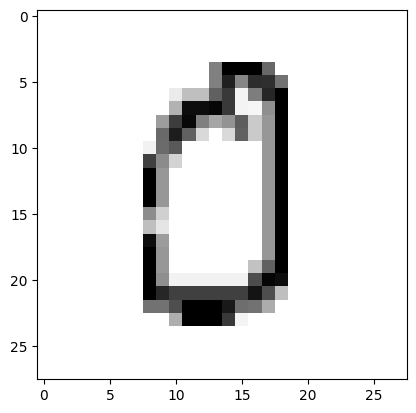

In [50]:
some_digit=X_train[90]
some_digit_img=some_digit.reshape(28,28)
plt.imshow(some_digit_img,cmap=matplotlib.cm.binary,interpolation="nearest")

In [51]:
y_train[90]

0

In [52]:
X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

# Perform PCA with 10 components
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_2d)
X_test_pca = pca.transform(X_test_2d)

In [53]:
y_train[1].dtype

dtype('uint8')

#  function to find various parameters

In [54]:
def evaluate_model(model, x_train, y_train, x_test, y_test):
    # Fit the model on the training data
    model.fit(x_train, y_train)

    # Predict labels for the test data
    y_pred = model.predict(x_test)

    # Calculate accuracy, f1-score, and recall
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')

    # Calculate ROC-AUC score
    y_pred_proba = model.predict_proba(x_test)
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    
    # Calculating Confusion Matrix
    conf_matrix=confusion_matrix(y_test,y_pred)

    # Return evaluation metrics
    return accuracy, f1, recall, roc_auc, conf_matrix

In [55]:
dt_classifier = DecisionTreeClassifier()
dt_accuracy, dt_f1, dt_recall, dt_roc_auc, dt_confusion_matrix = evaluate_model(dt_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree F1-score:", dt_f1)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree ROC-AUC:", dt_roc_auc)
print("Decision Tree Confusion Matrix:")
print(dt_confusion_matrix)

Decision Tree Accuracy: 0.8018
Decision Tree F1-score: 0.8010955633649288
Decision Tree Recall: 0.8017999999999998
Decision Tree ROC-AUC: 0.889888888888889
Decision Tree Confusion Matrix:
[[726 154   9  34   9   1   2   8  41  16]
 [ 76 814   4  27  15  13   3   8  26  14]
 [  4   3 924   7   2  27  10   7   5  11]
 [ 14  12   8 770  35  30  28  59  24  20]
 [  1   4   3  37 853  48   6   7  14  27]
 [  5  17   5  14 117 790  13   6  20  13]
 [  8   3   4  41  19  29 770  98   3  25]
 [ 13  13   8  56  27   7 153 671  19  33]
 [ 56  19  13   8   3   7   5   4 870  15]
 [ 19  35   2   6  29  11   9   6  53 830]]


In [56]:
rf_classifier = RandomForestClassifier()
rf_accuracy, rf_f1, rf_recall, rf_roc_auc, rf_confusion_matrix = evaluate_model(rf_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest F1-score:", rf_f1)
print("Random Forest Recall:", rf_recall)
print("Random Forest ROC-AUC:", rf_roc_auc)
print("Random Forest Confusion Matrix",rf_confusion_matrix)

Random Forest Accuracy: 0.8729
Random Forest F1-score: 0.8722045195842243
Random Forest Recall: 0.8729000000000001
Random Forest ROC-AUC: 0.98936315
Random Forest Confusion Matrix [[773 150   3  32   5   0   3   5  21   8]
 [ 33 911   0  21   5   3   0   3  16   8]
 [  4   1 981   3   0   6   0   3   1   1]
 [  9   9   2 883  18  23   9  29  16   2]
 [  0   1   0  30 922  29   1   2   9   6]
 [  0   3   1   9 120 847   4   4   9   3]
 [  3   8   1  51  12  24 827  55   3  16]
 [  6  10   2  43  23   1 131 742   9  33]
 [ 17  16   3   6   3   4   1   0 947   3]
 [  6  14   0   2  16   0   7   5  54 896]]


In [57]:
nb_classifier = GaussianNB()
nb_accuracy, nb_f1, nb_recall, nb_roc_auc, nb_confusion_matrix = evaluate_model(nb_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes F1-score:", nb_f1)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes ROC-AUC:", nb_roc_auc)
print("Naive Bayes Confusion Matrix:")
print(nb_confusion_matrix)

Naive Bayes Accuracy: 0.7725
Naive Bayes F1-score: 0.7711193597176934
Naive Bayes Recall: 0.7725
Naive Bayes ROC-AUC: 0.9722647555555556
Naive Bayes Confusion Matrix:
[[608 229  16  70   8   0   2  13  45   9]
 [ 25 749   9 121   8   2   0   0  66  20]
 [  9   1 967   3   0  15   1   3   1   0]
 [ 13   7   2 844  32  16  21  64   0   1]
 [  1   1   1  38 872  43   1   8  28   7]
 [  0   2  15  47 165 731   6  16  12   6]
 [  5   9  50  30  25  44 730  94   3  10]
 [  9  17   4  80  50   1 177 650   2  10]
 [ 89  36  26   6   4   3   2   4 822   8]
 [ 19  28   1   8  62   0   3  21 106 752]]


In [58]:
knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_accuracy, knn_f1, knn_recall, knn_roc_auc, knn_confusion_matrix = evaluate_model(knn_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("K-NN Accuracy:", knn_accuracy)
print("K-NN F1-score:", knn_f1)
print("K-NN Recall:", knn_recall)
print("K-NN ROC-AUC:", knn_roc_auc)
print("K-NN Confusion Matrix")
print(knn_confusion_matrix)

K-NN Accuracy: 0.8813
K-NN F1-score: 0.8801833533237987
K-NN Recall: 0.8813000000000001
K-NN ROC-AUC: 0.9737528000000001
K-NN Confusion Matrix
[[776 169   1  27   2   0   2   3  14   6]
 [ 18 943   0  16   4   1   0   2  11   5]
 [  6   1 979   3   0   7   1   2   1   0]
 [ 10  12   0 887  20  22   4  15  25   5]
 [  0   1   0  14 952  22   1   2   4   4]
 [  0   3   0   8 116 857   3   3   4   6]
 [  0   6   0  42  21  10 841  66   0  14]
 [  7   8   0  52  34   3 167 698   6  25]
 [ 15   9   2   1   3   6   3   0 958   3]
 [  5   7   0   0  24   0   7   5  30 922]]


In [59]:
svm_classifier = SVC(probability=True)
svm_accuracy, svm_f1, svm_recall, svm_roc_auc, svm_confusion_matrix = evaluate_model(svm_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("SVM Accuracy:", svm_accuracy)
print("SVM F1-score:", svm_f1)
print("SVM Recall:", svm_recall)
print("SVM ROC-AUC:", svm_roc_auc)
print("SVM confusion Matrix")
print(svm_confusion_matrix)

SVM Accuracy: 0.8867
SVM F1-score: 0.8861691702191447
SVM Recall: 0.8866999999999999
SVM ROC-AUC: 0.9925485555555555
SVM confusion Matrix
[[810 140   1  22   6   0   1   2  15   3]
 [ 19 924   0  27   3   3   0   4  12   8]
 [  3   2 984   1   0   5   0   3   1   1]
 [  8  11   0 886  20  22   8  27  18   0]
 [  0   1   0  14 948  22   0   0   5  10]
 [  0   4   1   4 124 854   3   3   4   3]
 [  0  10   1  50  20  22 844  40   0  13]
 [  6  13   0  33  17   4 135 747   7  38]
 [  8  14   4   0   4   4   3   0 959   4]
 [  2  13   0   0  24   0   6   3  41 911]]


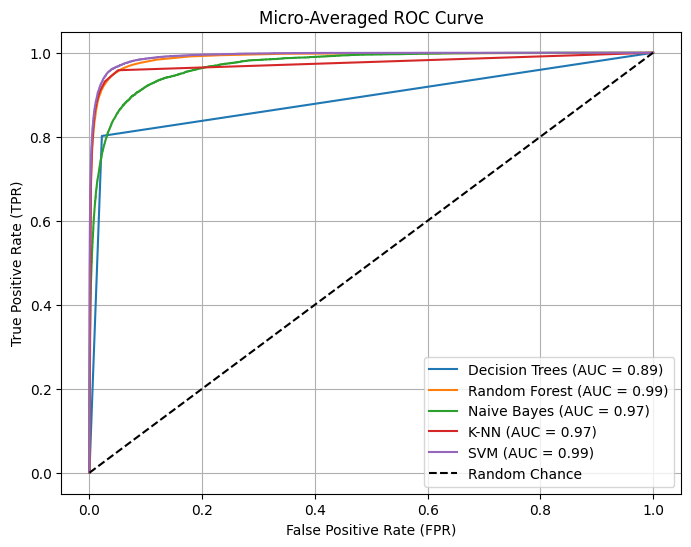

In [60]:
# Convert the true labels to one-hot encoded format
y_test_bin = label_binarize(y_test, classes=range(10))

# For Decision Trees
dt_pred_probs = dt_classifier.predict_proba(X_test_pca)
dt_fpr, dt_tpr, _ = roc_curve(y_test_bin.ravel(), dt_pred_probs.ravel())
dt_auc = auc(dt_fpr, dt_tpr)

# For Random Forest
rf_pred_probs = rf_classifier.predict_proba(X_test_pca)
rf_fpr, rf_tpr, _ = roc_curve(y_test_bin.ravel(), rf_pred_probs.ravel())
rf_auc = auc(rf_fpr, rf_tpr)

# For Naive Bayes
nb_pred_probs = nb_classifier.predict_proba(X_test_pca)
nb_fpr, nb_tpr, _ = roc_curve(y_test_bin.ravel(), nb_pred_probs.ravel())
nb_auc = auc(nb_fpr, nb_tpr)

# For K-NN
knn_pred_probs = knn_classifier.predict_proba(X_test_pca)
knn_fpr, knn_tpr, _ = roc_curve(y_test_bin.ravel(), knn_pred_probs.ravel())
knn_auc = auc(knn_fpr, knn_tpr)

# For SVM
svm_pred_probs = svm_classifier.predict_proba(X_test_pca)
svm_fpr, svm_tpr, _ = roc_curve(y_test_bin.ravel(), svm_pred_probs.ravel())
svm_auc = auc(svm_fpr, svm_tpr)


# Plot micro-averaged ROC curves for each classifier
plt.figure(figsize=(8, 6))
plt.plot(dt_fpr, dt_tpr, label='Decision Trees (AUC = {:.2f})'.format(dt_auc))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_auc))
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (AUC = {:.2f})'.format(nb_auc))
plt.plot(knn_fpr, knn_tpr, label='K-NN (AUC = {:.2f})'.format(knn_auc))
plt.plot(svm_fpr, svm_tpr, label='SVM (AUC = {:.2f})'.format(svm_auc))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Micro-Averaged ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

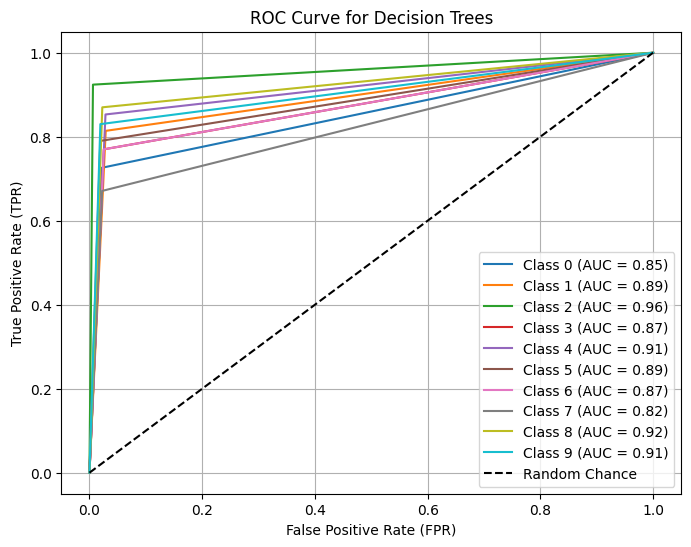

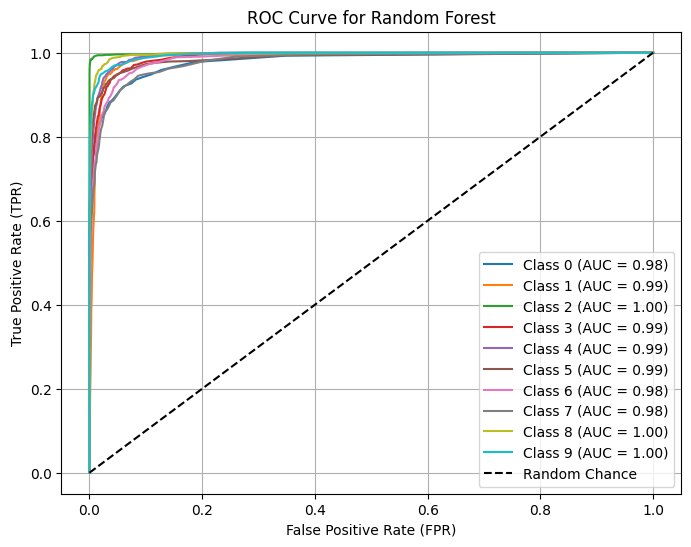

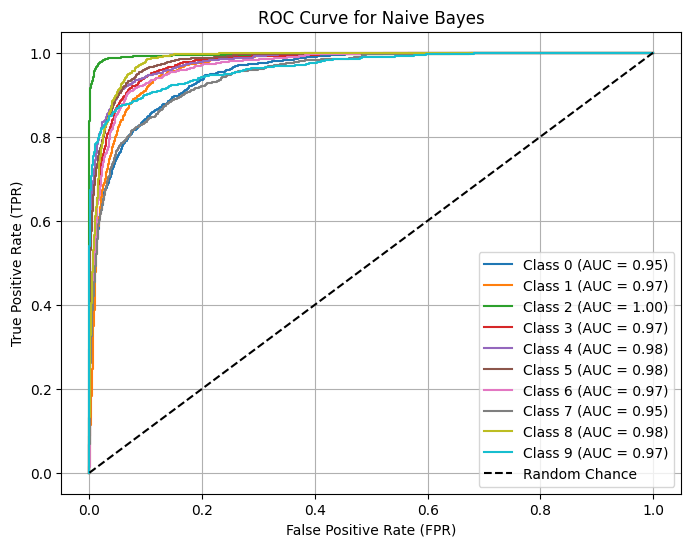

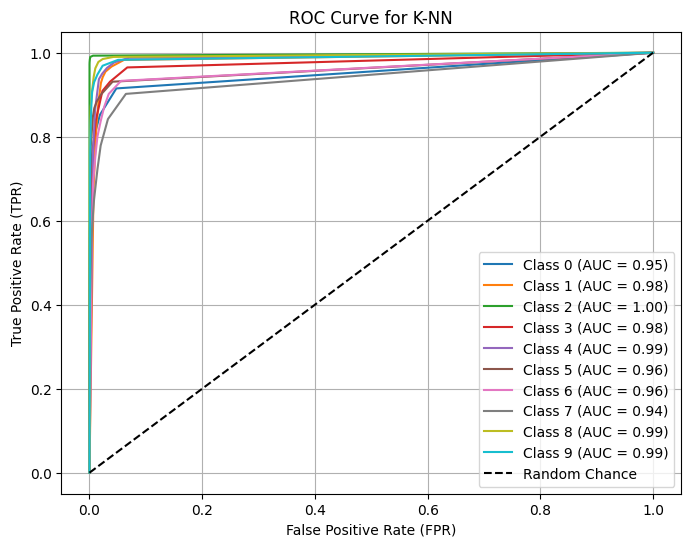

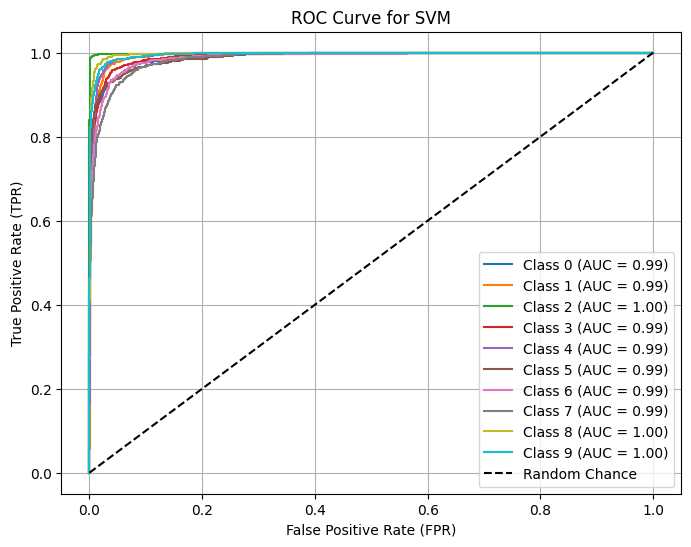

In [61]:
# Convert the true labels to one-hot encoded format
y_test_bin = label_binarize(y_test, classes=range(10))

# For Decision Trees
dt_fpr = dict()
dt_tpr = dict()
dt_auc = dict()
for class_idx in range(10):
    dt_pred_probs = dt_classifier.predict_proba(X_test_pca)[:, class_idx]
    dt_fpr[class_idx], dt_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], dt_pred_probs)
    dt_auc[class_idx] = auc(dt_fpr[class_idx], dt_tpr[class_idx])

# For Random Forest
rf_fpr = dict()
rf_tpr = dict()
rf_auc = dict()
for class_idx in range(10):
    rf_pred_probs = rf_classifier.predict_proba(X_test_pca)[:, class_idx]
    rf_fpr[class_idx], rf_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], rf_pred_probs)
    rf_auc[class_idx] = auc(rf_fpr[class_idx], rf_tpr[class_idx])

# For Naive Bayes
nb_fpr = dict()
nb_tpr = dict()
nb_auc = dict()
for class_idx in range(10):
    nb_pred_probs = nb_classifier.predict_proba(X_test_pca)[:, class_idx]
    nb_fpr[class_idx], nb_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], nb_pred_probs)
    nb_auc[class_idx] = auc(nb_fpr[class_idx], nb_tpr[class_idx])

# For K-NN
knn_fpr = dict()
knn_tpr = dict()
knn_auc = dict()
for class_idx in range(10):
    knn_pred_probs = knn_classifier.predict_proba(X_test_pca)[:, class_idx]
    knn_fpr[class_idx], knn_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], knn_pred_probs)
    knn_auc[class_idx] = auc(knn_fpr[class_idx], knn_tpr[class_idx])

# For SVM
svm_fpr = dict()
svm_tpr = dict()
svm_auc = dict()
for class_idx in range(10):
    svm_pred_probs = svm_classifier.predict_proba(X_test_pca)[:, class_idx]
    svm_fpr[class_idx], svm_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], svm_pred_probs)
    svm_auc[class_idx] = auc(svm_fpr[class_idx], svm_tpr[class_idx])

# Plot ROC curves for each class for Decision Trees
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(dt_fpr[class_idx], dt_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, dt_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Decision Trees')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot ROC curves for each class for Random Forest
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(rf_fpr[class_idx], rf_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, rf_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot ROC curves for each class for Naive Bayes
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(nb_fpr[class_idx], nb_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, nb_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot ROC curves for each class for K-NN
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(knn_fpr[class_idx], knn_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, knn_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for K-NN')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot ROC curves for each class for SVM
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(svm_fpr[class_idx], svm_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, svm_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for SVM')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# NOW WE CHANGE THE COMPONENT SIZW TO 15

In [62]:
# Perform PCA with 15 components

X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_train_2d)
X_test_pca = pca.transform(X_test_2d)

In [63]:
dt_classifier = DecisionTreeClassifier()
dt_accuracy, dt_f1, dt_recall, dt_roc_auc, dt_confusion_matrix = evaluate_model(dt_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree F1-score:", dt_f1)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree ROC-AUC:", dt_roc_auc)
print("Decision Tree Confusion Matrix:")
print(dt_confusion_matrix)

Decision Tree Accuracy: 0.8084
Decision Tree F1-score: 0.8075361687208747
Decision Tree Recall: 0.8084
Decision Tree ROC-AUC: 0.8935555555555557
Decision Tree Confusion Matrix:
[[720 151  10  41   4   7   2   7  42  16]
 [ 81 812   8  17   6  13   9   5  32  17]
 [  7   2 936   5   1  23   8   8   4   6]
 [ 13  12   7 780  28  30  32  73  14  11]
 [  2   1   5  35 837  57  12   8  18  25]
 [  9   6   3  14 110 812  10   7  14  15]
 [  5   7  11  48  25  22 789  66   9  18]
 [ 12  13   5  45  30  11 116 685  14  69]
 [ 47  16  10   7   4  18   3   1 878  16]
 [ 13  39   3   2  16  10   8   6  68 835]]


In [64]:
rf_classifier = RandomForestClassifier()
rf_accuracy, rf_f1, rf_recall, rf_roc_auc, rf_confusion_matrix = evaluate_model(rf_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest F1-score:", rf_f1)
print("Random Forest Recall:", rf_recall)
print("Random Forest ROC-AUC:", rf_roc_auc)
print("Random Forest Confusion Matrix",rf_confusion_matrix)

Random Forest Accuracy: 0.8934
Random Forest F1-score: 0.8928270737941583
Random Forest Recall: 0.8934
Random Forest ROC-AUC: 0.9921159777777777
Random Forest Confusion Matrix [[798 150   2  16   8   0   2   3  15   6]
 [ 19 925   1  19   5   3   0   2  18   8]
 [  4   2 982   3   0   5   2   1   1   0]
 [  8  10   1 915  17  19   4  22   3   1]
 [  0   1   0  16 938  24   3   4   7   7]
 [  0   1   0  10 112 864   2   3   6   2]
 [  3   6   0  32  18  22 873  26   3  17]
 [  8  10   0  33  19   4 107 769   6  44]
 [ 18   6   1   3   2   5   1   0 962   2]
 [  5   9   0   0  11   0   7   2  58 908]]


In [65]:
nb_classifier = GaussianNB()
nb_accuracy, nb_f1, nb_recall, nb_roc_auc, nb_confusion_matrix = evaluate_model(nb_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes F1-score:", nb_f1)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes ROC-AUC:", nb_roc_auc)
print("Naive Bayes Confusion Matrix:")
print(nb_confusion_matrix)

Naive Bayes Accuracy: 0.7838
Naive Bayes F1-score: 0.7822606248714465
Naive Bayes Recall: 0.7837999999999999
Naive Bayes ROC-AUC: 0.9747469444444444
Naive Bayes Confusion Matrix:
[[602 237  19  46  11   0   2  14  61   8]
 [ 17 776   8  95  18   6   0   2  61  17]
 [  9   2 977   4   0   5   1   0   1   1]
 [ 17  10   3 793  37  19  32  89   0   0]
 [  0   1   1  18 870  44   2  22  32  10]
 [  0   1   8  35 177 736   5  20  13   5]
 [  6   7  51  21  25  40 786  48   3  13]
 [  7  16   7  50  37   1 193 675   2  12]
 [115  24  20   3   3   6   3   1 818   7]
 [ 29  12   3   0  30   0  13   8 100 805]]


In [66]:
knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_accuracy, knn_f1, knn_recall, knn_roc_auc, knn_confusion_matrix = evaluate_model(knn_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("K-NN Accuracy:", knn_accuracy)
print("K-NN F1-score:", knn_f1)
print("K-NN Recall:", knn_recall)
print("K-NN ROC-AUC:", knn_roc_auc)
print("K-NN Confusion Matrix")
print(knn_confusion_matrix)

K-NN Accuracy: 0.9071
K-NN F1-score: 0.9065251143832963
K-NN Recall: 0.9071
K-NN ROC-AUC: 0.9824026388888889
K-NN Confusion Matrix
[[804 161   3  14   8   0   1   0   6   3]
 [ 16 961   0   5   6   0   0   0   8   4]
 [  4   2 985   3   0   4   1   0   1   0]
 [  9  11   1 915  26  24   2   9   3   0]
 [  0   1   0   5 974   9   1   1   4   5]
 [  0   0   0  10  96 889   2   0   2   1]
 [  2   1   0  27  28  11 887  35   0   9]
 [  7   7   1  35  31   6 124 759   2  28]
 [ 15   6   2   1   2   4   3   0 964   3]
 [  8   7   0   0  19   5   6   2  20 933]]


In [67]:
svm_classifier = SVC(probability=True)
svm_accuracy, svm_f1, svm_recall, svm_roc_auc, svm_confusion_matrix = evaluate_model(svm_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("SVM Accuracy:", svm_accuracy)
print("SVM F1-score:", svm_f1)
print("SVM Recall:", svm_recall)
print("SVM ROC-AUC:", svm_roc_auc)
print("SVM confusion Matrix")
print(svm_confusion_matrix)

SVM Accuracy: 0.9144
SVM F1-score: 0.9139140811145532
SVM Recall: 0.9144
SVM ROC-AUC: 0.9953768666666667
SVM confusion Matrix
[[825 129   1  18   5   0   0   5  12   5]
 [ 14 952   0  12   3   3   1   2   9   4]
 [  3   0 986   3   0   3   1   2   2   0]
 [  7   7   0 914  17  18   6  29   2   0]
 [  0   1   0   9 958  16   2   1   6   7]
 [  0   0   0   8 102 885   2   0   3   0]
 [  0   2   1  20  19  21 910  10   1  16]
 [ 17   9   0  21  17   1  84 801   2  48]
 [  6   3   2   1   2   3   1   0 977   5]
 [  5   9   0   0   9   0   5   0  36 936]]


# NOW WE CHANGE THE COMPONENT SIZW TO 20

In [68]:
# Perform PCA with 20 components

X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train_2d)
X_test_pca = pca.transform(X_test_2d)

In [69]:
dt_classifier = DecisionTreeClassifier()
dt_accuracy, dt_f1, dt_recall, dt_roc_auc, dt_confusion_matrix = evaluate_model(dt_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree F1-score:", dt_f1)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree ROC-AUC:", dt_roc_auc)
print("Decision Tree Confusion Matrix:")
print(dt_confusion_matrix)

Decision Tree Accuracy: 0.8099
Decision Tree F1-score: 0.8091308233162268
Decision Tree Recall: 0.8099000000000001
Decision Tree ROC-AUC: 0.8943888888888889
Decision Tree Confusion Matrix:
[[742 141  10  34   3   6   6   9  30  19]
 [ 97 801  12  27   6  14   7   9  17  10]
 [  5   5 933  14   2  18   8   6   3   6]
 [ 20   8   9 791  29  29  23  79   9   3]
 [  3   2   2  34 843  48  17  13  14  24]
 [  9   6   5  28  94 807   8  14  17  12]
 [  8   4   5  41  23  23 803  61   5  27]
 [ 16  11   9  52  25   9 133 670  12  63]
 [ 35  21   9   4   7  23   2   0 879  20]
 [ 17  36   3   3  26  10   5   9  61 830]]


In [70]:
rf_classifier = RandomForestClassifier()
rf_accuracy, rf_f1, rf_recall, rf_roc_auc, rf_confusion_matrix = evaluate_model(rf_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest F1-score:", rf_f1)
print("Random Forest Recall:", rf_recall)
print("Random Forest ROC-AUC:", rf_roc_auc)
print("Random Forest Confusion Matrix",rf_confusion_matrix)

Random Forest Accuracy: 0.8989
Random Forest F1-score: 0.8983549839952989
Random Forest Recall: 0.8989
Random Forest ROC-AUC: 0.9932125833333334
Random Forest Confusion Matrix [[803 149   1  18   6   0   2   2  14   5]
 [ 17 930   1  26   6   3   0   0  12   5]
 [  4   1 983   1   0   6   1   1   2   1]
 [  9   9   1 920  16  18   4  20   3   0]
 [  0   1   0  19 936  23   2   3   8   8]
 [  0   1   0  12  96 876   3   5   5   2]
 [  3   6   0  23  19  23 892  16   2  16]
 [  8   9   0  34  23   4 103 771   5  43]
 [ 17   4   1   1   2   8   3   0 963   1]
 [  4   6   0   0  16   0   8   2  49 915]]


In [71]:
nb_classifier = GaussianNB()
nb_accuracy, nb_f1, nb_recall, nb_roc_auc, nb_confusion_matrix = evaluate_model(nb_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes F1-score:", nb_f1)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes ROC-AUC:", nb_roc_auc)
print("Naive Bayes Confusion Matrix:")
print(nb_confusion_matrix)

Naive Bayes Accuracy: 0.7982
Naive Bayes F1-score: 0.7968654847249991
Naive Bayes Recall: 0.7982
Naive Bayes ROC-AUC: 0.9768207333333333
Naive Bayes Confusion Matrix:
[[618 233  17  45   9   0   2  12  56   8]
 [ 16 800   2  89  10   7   0   3  57  16]
 [ 14   1 972   4   0   5   2   0   1   1]
 [ 19   9   3 804  32  19  24  90   0   0]
 [  2   0   0  18 882  26   3  25  31  13]
 [  0   1   5  36 171 740   4  23  16   4]
 [  7   5  33  12  24  48 815  41   1  14]
 [  9  11   4  40  33   1 181 704   4  13]
 [ 98  28  26   3   2   5   1   2 827   8]
 [ 14   9   4   1  20   0   8  17 107 820]]


In [72]:
knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_accuracy, knn_f1, knn_recall, knn_roc_auc, knn_confusion_matrix = evaluate_model(knn_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("K-NN Accuracy:", knn_accuracy)
print("K-NN F1-score:", knn_f1)
print("K-NN Recall:", knn_recall)
print("K-NN ROC-AUC:", knn_roc_auc)
print("K-NN Confusion Matrix")
print(knn_confusion_matrix)

K-NN Accuracy: 0.9202
K-NN F1-score: 0.9198980448393504
K-NN Recall: 0.9202
K-NN ROC-AUC: 0.9843281055555556
K-NN Confusion Matrix
[[816 148   0  14   7   0   1   0   9   5]
 [  7 975   0   7   4   0   1   0   3   3]
 [  2   2 990   2   0   2   2   0   0   0]
 [  9  16   2 926  18  18   1   9   1   0]
 [  0   1   0   6 979   6   2   1   1   4]
 [  0   0   0  10  94 892   2   0   2   0]
 [  1   5   0   6  31   9 916  20   0  12]
 [ 10   3   0  31  39   3 103 791   1  19]
 [ 15   6   2   0   2   4   0   0 970   1]
 [  3   8   0   0  13   3  10   1  15 947]]


In [73]:
svm_classifier = SVC(probability=True)
svm_accuracy, svm_f1, svm_recall, svm_roc_auc, svm_confusion_matrix = evaluate_model(svm_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("SVM Accuracy:", svm_accuracy)
print("SVM F1-score:", svm_f1)
print("SVM Recall:", svm_recall)
print("SVM ROC-AUC:", svm_roc_auc)
print("SVM confusion Matrix")
print(svm_confusion_matrix)

SVM Accuracy: 0.9309
SVM F1-score: 0.9304751044560977
SVM Recall: 0.9309
SVM ROC-AUC: 0.9968162777777778
SVM confusion Matrix
[[851 113   0  15   4   0   0   4  10   3]
 [  7 967   0  12   3   0   1   1   5   4]
 [  3   0 990   3   0   2   1   0   1   0]
 [  7   5   4 933  16  19   4  12   0   0]
 [  0   1   0  10 972   6   1   0   5   5]
 [  0   1   0   8  75 909   2   1   4   0]
 [  0   2   0   8  18  17 933   9   0  13]
 [ 16   8   0  29  19   2  73 818   0  35]
 [  7   2   1   0   2   1   1   0 983   3]
 [  4   6   0   0   8   0   3   0  26 953]]


# NOW WE CHANGE THE COMPONENT SIZW TO 25

In [74]:
# Perform PCA with 25 components

X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

pca = PCA(n_components=25)
X_train_pca = pca.fit_transform(X_train_2d)
X_test_pca = pca.transform(X_test_2d)

In [75]:
dt_classifier = DecisionTreeClassifier()
dt_accuracy, dt_f1, dt_recall, dt_roc_auc, dt_confusion_matrix = evaluate_model(dt_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree F1-score:", dt_f1)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree ROC-AUC:", dt_roc_auc)
print("Decision Tree Confusion Matrix:")
print(dt_confusion_matrix)

Decision Tree Accuracy: 0.8049
Decision Tree F1-score: 0.8041091433617746
Decision Tree Recall: 0.8049
Decision Tree ROC-AUC: 0.8916111111111112
Decision Tree Confusion Matrix:
[[726 142  11  32  12   4  10  10  36  17]
 [104 790   6  25   9  11  13   8  24  10]
 [  4   5 928  11   1  29   6  10   3   3]
 [ 17  15  12 787  26  28  33  66  13   3]
 [  1   0   0  33 835  48  13  15  21  34]
 [  9   7   4  21  94 820   6  11  17  11]
 [  5   7   3  40  20  30 794  68   8  25]
 [ 12  13   8  57  26  12 118 670  18  66]
 [ 39  19   9  10   9  15   4   2 877  16]
 [ 17  35   8   6  23  10   9   8  62 822]]


In [76]:
rf_classifier = RandomForestClassifier()
rf_accuracy, rf_f1, rf_recall, rf_roc_auc, rf_confusion_matrix = evaluate_model(rf_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest F1-score:", rf_f1)
print("Random Forest Recall:", rf_recall)
print("Random Forest ROC-AUC:", rf_roc_auc)
print("Random Forest Confusion Matrix",rf_confusion_matrix)

Random Forest Accuracy: 0.9034
Random Forest F1-score: 0.9028561554679218
Random Forest Recall: 0.9033999999999999
Random Forest ROC-AUC: 0.9933290444444444
Random Forest Confusion Matrix [[804 143   2  21   6   0   2   1  14   7]
 [ 15 939   1  21   4   3   0   1  10   6]
 [  3   2 983   2   0   6   1   2   1   0]
 [ 11   6   1 929  16  18   4  13   2   0]
 [  0   1   0  24 938  21   1   2   7   6]
 [  0   1   0  12  91 878   2   5   5   6]
 [  3   6   1  25  18  20 892  16   2  17]
 [  7   8   0  34  23   3  94 783   4  44]
 [ 17   6   1   3   2   4   1   0 965   1]
 [  4   3   0   1  13   0   9   2  45 923]]


In [77]:
nb_classifier = GaussianNB()
nb_accuracy, nb_f1, nb_recall, nb_roc_auc, nb_confusion_matrix = evaluate_model(nb_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes F1-score:", nb_f1)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes ROC-AUC:", nb_roc_auc)
print("Naive Bayes Confusion Matrix:")
print(nb_confusion_matrix)

Naive Bayes Accuracy: 0.806
Naive Bayes F1-score: 0.8047180843062582
Naive Bayes Recall: 0.8059999999999998
Naive Bayes ROC-AUC: 0.9780390222222224
Naive Bayes Confusion Matrix:
[[634 228  16  48  10   0   2  11  45   6]
 [ 11 822   4  87  10   6   0   1  48  11]
 [ 11   1 978   3   0   3   2   1   0   1]
 [ 16  10   1 815  34  17  17  90   0   0]
 [  2   0   0  19 886  30   3  26  26   8]
 [  0   1   5  23 160 761   5  26  16   3]
 [  6   6  38  14  24  49 806  45   0  12]
 [ 11   9   7  46  31   2 181 695   4  14]
 [ 94  26  18   2   2   9   1   4 836   8]
 [  8   8   2   1  22   0   8  14 110 827]]


In [78]:
knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_accuracy, knn_f1, knn_recall, knn_roc_auc, knn_confusion_matrix = evaluate_model(knn_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("K-NN Accuracy:", knn_accuracy)
print("K-NN F1-score:", knn_f1)
print("K-NN Recall:", knn_recall)
print("K-NN ROC-AUC:", knn_roc_auc)
print("K-NN Confusion Matrix")
print(knn_confusion_matrix)

K-NN Accuracy: 0.9226
K-NN F1-score: 0.922219485839685
K-NN Recall: 0.9226000000000001
K-NN ROC-AUC: 0.9850915666666668
K-NN Confusion Matrix
[[816 152   0  10   6   0   0   0  11   5]
 [  8 976   0   3   5   0   0   0   5   3]
 [  2   1 991   2   0   2   2   0   0   0]
 [  6  14   2 933  16  18   2   7   2   0]
 [  0   0   0   6 982   4   1   1   1   5]
 [  0   0   0   6  88 902   2   0   1   1]
 [  1   4   0  13  31  11 905  23   0  12]
 [ 10   2   0  35  40   2  89 799   1  22]
 [ 18   3   2   0   2   2   0   0 970   3]
 [  4   7   0   0  10   3   7   2  15 952]]


In [79]:
svm_classifier = SVC(probability=True)
svm_accuracy, svm_f1, svm_recall, svm_roc_auc, svm_confusion_matrix = evaluate_model(svm_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("SVM Accuracy:", svm_accuracy)
print("SVM F1-score:", svm_f1)
print("SVM Recall:", svm_recall)
print("SVM ROC-AUC:", svm_roc_auc)
print("SVM confusion Matrix")
print(svm_confusion_matrix)

SVM Accuracy: 0.9369
SVM F1-score: 0.9366373388817217
SVM Recall: 0.9369000000000002
SVM ROC-AUC: 0.9970672111111112
SVM confusion Matrix
[[856 112   0  13   4   0   0   3   8   4]
 [ 10 962   1  12   4   0   0   1   6   4]
 [  4   0 990   3   0   0   1   1   1   0]
 [  5   5   2 936  18  17   4  13   0   0]
 [  1   0   0   8 973   6   2   0   5   5]
 [  0   1   0   5  65 923   2   0   4   0]
 [  2   0   0   8  17  17 934   7   0  15]
 [ 17   7   0  20  19   1  55 848   1  32]
 [  6   3   1   0   2   1   1   0 983   3]
 [  6   5   0   0   5   1   2   0  17 964]]


# NOW WE CHANGE THE COMPONENT SIZE TO 30

In [80]:
# Perform PCA with 30 components

X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

pca = PCA(n_components=30)
X_train_pca = pca.fit_transform(X_train_2d)
X_test_pca = pca.transform(X_test_2d)

In [81]:
dt_classifier = DecisionTreeClassifier()
dt_accuracy, dt_f1, dt_recall, dt_roc_auc, dt_confusion_matrix = evaluate_model(dt_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree F1-score:", dt_f1)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree ROC-AUC:", dt_roc_auc)
print("Decision Tree Confusion Matrix:")
print(dt_confusion_matrix)

Decision Tree Accuracy: 0.803
Decision Tree F1-score: 0.8019099846756639
Decision Tree Recall: 0.8029999999999999
Decision Tree ROC-AUC: 0.8905555555555555
Decision Tree Confusion Matrix:
[[713 158  16  26   4   4   6  13  45  15]
 [ 98 795   8  23   6  15   5  11  26  13]
 [  5   1 930  11   3  28   3  10   4   5]
 [ 14  10  12 779  27  33  21  81  11  12]
 [  5   1   0  35 841  53  12  11  18  24]
 [  6  12   7  21  97 805   8  14  19  11]
 [  9   6   5  41  19  29 802  65   7  17]
 [ 12  13   7  45  22  14 147 654   8  78]
 [ 36  18   9   3   7  18   8   3 885  13]
 [ 23  34   5   8  20  12   4   9  59 826]]


In [82]:
rf_classifier = RandomForestClassifier()
rf_accuracy, rf_f1, rf_recall, rf_roc_auc, rf_confusion_matrix = evaluate_model(rf_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest F1-score:", rf_f1)
print("Random Forest Recall:", rf_recall)
print("Random Forest ROC-AUC:", rf_roc_auc)
print("Random Forest Confusion Matrix",rf_confusion_matrix)

Random Forest Accuracy: 0.9076
Random Forest F1-score: 0.9069731879667675
Random Forest Recall: 0.9076000000000001
Random Forest ROC-AUC: 0.9938252000000001
Random Forest Confusion Matrix [[808 147   1  18   3   0   2   3  15   3]
 [ 11 940   1  24   4   1   0   0  14   5]
 [  5   0 984   2   1   5   1   0   2   0]
 [  8   8   1 933  12  16   4  16   2   0]
 [  0   1   0  19 947  15   2   2   9   5]
 [  0   1   1  11  89 883   3   2   5   5]
 [  3   3   2  17  20  19 900  17   1  18]
 [  8   8   2  34  15   3  99 783   5  43]
 [ 13   3   1   0   3   2   2   0 975   1]
 [  5   5   0   0  10   0   8   1  48 923]]


In [83]:
nb_classifier = GaussianNB()
nb_accuracy, nb_f1, nb_recall, nb_roc_auc, nb_confusion_matrix = evaluate_model(nb_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes F1-score:", nb_f1)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes ROC-AUC:", nb_roc_auc)
print("Naive Bayes Confusion Matrix:")
print(nb_confusion_matrix)

Naive Bayes Accuracy: 0.8143
Naive Bayes F1-score: 0.8130372921776233
Naive Bayes Recall: 0.8142999999999999
Naive Bayes ROC-AUC: 0.9790744
Naive Bayes Confusion Matrix:
[[642 233  19  33  10   0   2  11  42   8]
 [ 10 841   4  66  10   6   0   3  47  13]
 [ 11   1 980   3   0   1   2   1   0   1]
 [ 17  11   1 820  27  17  18  89   0   0]
 [  0   0   1  16 881  31   4  26  31  10]
 [  0   1   4  21 151 779   6  16  19   3]
 [  6   5  36  14  25  42 810  48   0  14]
 [ 12   8   6  52  27   2 174 703   4  12]
 [ 84  25  22   3   4   5   3   2 847   5]
 [  8   9   1   1  21   0   9   9 102 840]]


In [84]:
knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_accuracy, knn_f1, knn_recall, knn_roc_auc, knn_confusion_matrix = evaluate_model(knn_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("K-NN Accuracy:", knn_accuracy)
print("K-NN F1-score:", knn_f1)
print("K-NN Recall:", knn_recall)
print("K-NN ROC-AUC:", knn_roc_auc)
print("K-NN Confusion Matrix")
print(knn_confusion_matrix)

K-NN Accuracy: 0.9256
K-NN F1-score: 0.9252899706856009
K-NN Recall: 0.9256
K-NN ROC-AUC: 0.985404061111111
K-NN Confusion Matrix
[[817 156   0   9   5   0   1   0   8   4]
 [  8 975   0   3   6   0   0   0   5   3]
 [  2   1 990   2   0   2   3   0   0   0]
 [  6  11   1 941  16  15   0   9   1   0]
 [  0   0   0   4 985   4   1   2   1   3]
 [  0   0   0   6  89 898   2   1   2   2]
 [  3   1   0   9  28   9 915  22   0  13]
 [  6   3   0  30  36   2  92 808   1  22]
 [ 17   3   3   0   3   1   1   0 970   2]
 [  4   6   0   0  12   2   6   2  11 957]]


In [85]:
svm_classifier = SVC(probability=True)
svm_accuracy, svm_f1, svm_recall, svm_roc_auc, svm_confusion_matrix = evaluate_model(svm_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("SVM Accuracy:", svm_accuracy)
print("SVM F1-score:", svm_f1)
print("SVM Recall:", svm_recall)
print("SVM ROC-AUC:", svm_roc_auc)
print("SVM confusion Matrix")
print(svm_confusion_matrix)

SVM Accuracy: 0.9387
SVM F1-score: 0.9383984352807115
SVM Recall: 0.9387000000000001
SVM ROC-AUC: 0.9974323333333333
SVM confusion Matrix
[[863 111   0   9   2   0   1   3   8   3]
 [  7 970   1  10   2   0   2   0   5   3]
 [  3   0 989   3   1   1   1   1   1   0]
 [  5   4   2 936  16  19   4  14   0   0]
 [  1   0   0   9 974   6   2   0   3   5]
 [  0   0   0   5  70 917   1   2   5   0]
 [  1   1   0   5  16  11 943   8   0  15]
 [ 15   4   0  20  18   1  70 843   2  27]
 [  6   0   1   0   2   4   0   0 985   2]
 [  6   7   0   0   4   0   1   0  15 967]]
